In [102]:
import tweepy
from textblob import TextBlob
import pandas as pd
import re
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [20]:
log =  pd.read_csv('credential.csv')

In [21]:
log

,APIKey,APIKey_Secret,Bearer_Token,Access_Token,Access_Token_Secret,Client_Secret,Client_ID
0,hKcXmiuOqnJi3I5K5J8Btd6Q3,lGHUjdZNmmqLoQhpRur7rVldBGboidZtgykRu418Q54JmL...,AAAAAAAAAAAAAAAAAAAAAAugbAEAAAAAJ%2Bl4l3i8yioX...,1511322388864147458-n3l2AzZyMZz2rYdoJWElTXmxpi...,GSJh5y6tGqerSJGPBfEp2GWhEQeHEoMvakDsgbSOiCNKG,NvV1twvN2K6E_24L-2Y60ahhFRy6BpcwlwgQV5pA6ymgM3...,TU0zOFlwU0NGZU0tekdDRXJlZ1c6MTpjaQ


In [22]:
log["Access_Token"][0]

'1511322388864147458-n3l2AzZyMZz2rYdoJWElTXmxpimjHF'

In [27]:
consumerKey = log["APIKey"][0]
consumerSecret = log["APIKey_Secret"][0]
accessToken = log["Access_Token"][0]
accessTokenSecret = log["Access_Token_Secret"][0]

In [24]:
consumerKey

'hKcXmiuOqnJi3I5K5J8Btd6Q3'

In [26]:
# consumerkey = log["key"][0]
# consumerSecret = log["key"][1]
# accessToken = log["key"][2]
# accessTokenSecret = log["key"][3]

In [ ]:
oauth2_user_handler = tweepy.OAuth2UserHandler(
    client_id=log["Client_ID"][0],
    redirect_uri="http://127.0.0.1:1410",
    scope=["Scope here", "Scope here"],
    # Client Secret is only necessary if using a confidential client
    client_secret= log["Client_Secret"][0]
)

In [28]:
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

authenticate.set_access_token(accessToken, accessTokenSecret)

api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [29]:
search_term = 'bitcoin -filter:retweets'

tweets = tweepy.Cursor(api.search_tweets, q=search_term, lang='en', tweet_mode='extended').items(200)

#all_tweets = [tweet.full_text for tweet in tweets]

In [30]:
for tweet in tweets:
    print(tweet.text)

Forbidden: 403 Forbidden
453 - You currently have Essential access which includes access to Twitter API v2 endpoints only. If you need access to this endpoint, you’ll need to apply for Elevated access via the Developer Portal. You can learn more here: https://developer.twitter.com/en/docs/twitter-api/getting-started/about-twitter-api#v2-access-leve

In [ ]:
tweets

In [ ]:
df = pd.DataFrame(all_tweets, columns=['Tweets'])

df.head(5)

# Reading Excel dataset

In [145]:
df =  pd.read_csv('Bitcoin_tweets.csv',low_memory=False)

In [146]:
df[raw_data.columns[0]].count() #checking rowcount

2573224

#### Data Cleaning

In [147]:
df = df.drop_duplicates('text',keep='first') # removing duplicate tweets

df[df.columns[0]].count()

2514313

In [148]:
#selecting only required columns
df = df[["user_name","user_followers","user_verified","date","text","is_retweet"]] 

In [149]:
# removing retweets and nan
df = df[df["is_retweet"]==False]

df[df.columns[0]].count()

2514082

In [150]:
# Selecting only influencers (verified account and have followers over 100K)

df = df[df["user_followers"]>=100000]

df = df[clean_data4["user_verified"]=="True"]

df[df.columns[0]].count()

7590

In [151]:
#checking date range of tweets
print("Max date= ", df["date"].max())
print("Min date= ", df["date"].min())

Max date=  2022-03-19 23:58:54
Min date=  2021-02-05 16:34:06


In [152]:
# function to remove emojis, symbols, pictures, map symbols etc
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [153]:
Cleaned_text=[] # list to store clean text

for i in range (len(df)):
    twt = re.sub('\\n', '', df["text"].iloc[i]) # removing \n
    twt = re.sub('#bitcoin', 'bitcoin', twt)             # removing # from #bitcoin
    twt = re.sub('#Bitcoin', 'Bitcoin', twt)             # removing # from #Bitcoin
    twt = re.sub('#[A-Za-z0-9]+', '', twt)               # removing all the other hashtags
    twt = re.sub('https?:\/\/\S+', '', twt)              # removing links
    twt = re.sub('@[A-Za-z0-9]+', '', twt)               # removing mentions using regular expression
    twt = deEmojify(twt)                                 # removing emojis using regular expression
    Cleaned_text.append(twt)

df["Cleaned_text"]=Cleaned_text

In [154]:
df[["text","Cleaned_text"]]

,text,Cleaned_text
880,#BlockstreamAQUA is our new #Bitcoin and @Liqu...,is our new Bitcoin and _BTC wallet designed t...
1411,"""It has to be part of the menu,"" says @JimCram...","""It has to be part of the menu,"" says on bitc..."
1615,"""It has to be part of the menu,"" says @JimCram...","""It has to be part of the menu,"" says on bitc..."
1665,"""We've done a lot of the upfront thinking to c...","""We've done a lot of the upfront thinking to c..."
1867,"This week, @intotheblock takes a dive into the...","This week, takes a dive into the rather wacky..."
...,...,...
2563637,What are you trading today? 😃\n\nKeep up to da...,What are you trading today? Keep up to date wi...
2567623,New #NFTCollection of #Pitbull Characters:Seas...,New of Characters:Season 2 is NOW live on➡️➡...
2567733,2020 we are broke \n\n2021 we became rich \n\n...,2020 we are broke 2021 we became rich 2022 we ...
2571611,"3/ Next up: Chromium milestone (aka, Satoshi R...","3/ Next up: Chromium milestone (aka, Satoshi R..."


In [156]:
def getSubjectivity(twt):
    return TextBlob(twt).sentiment.subjectivity

def getPolarity(twt):
    return TextBlob(twt).sentiment.polarity

df['Subjectivity'] = df['Cleaned_text'].apply(getSubjectivity)
df['Polarity'] = df['Cleaned_text'].apply(getPolarity)

In [157]:
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [158]:
df['Sentiment'] = df['Polarity'].apply(getSentiment)

In [159]:
df

,user_name,user_followers,user_verified,date,text,is_retweet,Cleaned_text,Subjectivity,Polarity,Sentiment
880,Blockstream,131970.0,True,2021-02-10 18:02:53,#BlockstreamAQUA is our new #Bitcoin and @Liqu...,False,is our new Bitcoin and _BTC wallet designed t...,0.762626,0.189899,Positive
1411,CNBC,3977144.0,True,2021-02-10 15:23:58,"""It has to be part of the menu,"" says @JimCram...",False,"""It has to be part of the menu,"" says on bitc...",0.000000,0.000000,Neutral
1615,Squawk Box,283910.0,True,2021-02-10 14:12:25,"""It has to be part of the menu,"" says @JimCram...",False,"""It has to be part of the menu,"" says on bitc...",0.000000,0.000000,Neutral
1665,Squawk Box,283910.0,True,2021-02-10 13:55:37,"""We've done a lot of the upfront thinking to c...",False,"""We've done a lot of the upfront thinking to c...",0.000000,0.000000,Neutral
1867,CoinMarketCap,731514.0,True,2021-02-10 12:45:03,"This week, @intotheblock takes a dive into the...",False,"This week, takes a dive into the rather wacky...",1.000000,0.500000,Positive
...,...,...,...,...,...,...,...,...,...,...
2563637,Phemex,497213.0,True,2022-03-15 08:10:01,What are you trading today? 😃\n\nKeep up to da...,False,What are you trading today? Keep up to date wi...,0.000000,0.000000,Neutral
2567623,Pitbull Token,137248.0,True,2022-03-15 02:57:00,New #NFTCollection of #Pitbull Characters:Seas...,False,New of Characters:Season 2 is NOW live on➡️➡...,0.713636,0.218182,Positive
2567733,Ash WSB,421646.0,True,2022-03-15 02:45:33,2020 we are broke \n\n2021 we became rich \n\n...,False,2020 we are broke 2021 we became rich 2022 we ...,0.750000,0.375000,Positive
2571611,DFINITY,579856.0,True,2022-03-14 21:23:09,"3/ Next up: Chromium milestone (aka, Satoshi R...",False,"3/ Next up: Chromium milestone (aka, Satoshi R...",0.350000,-0.025000,Negative


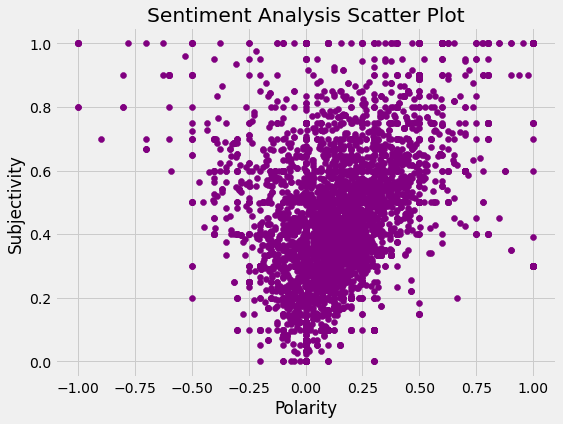

In [170]:
plt.figure(figsize = (8,6))
plt.scatter(df['Polarity'],df['Subjectivity'], color = 'Purple')
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

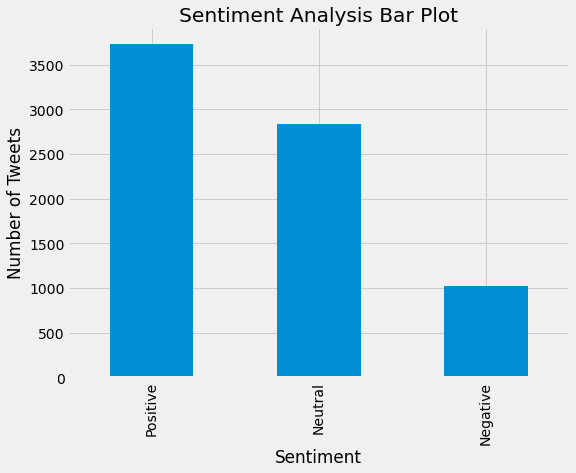

In [172]:
plt.figure(figsize = (8,6))
df['Sentiment'].value_counts().plot(kind = 'bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()